# Random Forest
 # 1.
## About the data: 
## Let’s consider a Company dataset with around 10 variables and 400 records. 
## The attributes are as follows: 
##  Sales -- Unit sales (in thousands) at each location
##  Competitor Price -- Price charged by competitor at each location
##  Income -- Community income level (in thousands of dollars)
##  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
##  Population -- Population size in region (in thousands)
##  Price -- Price company charges for car seats at each site
##  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
##  Age -- Average age of the local population
##  Education -- Education level at each location
##  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
##  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
## The company dataset looks like this: 
 
# Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('Company_Data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Company_Data.csv'

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
sns.distplot(data['Sales'])
#skewness and kurtosis
print("Skewness: %f" % data['Sales'].skew())
print("Kurtosis: %f" % data['Sales'].kurt())

In [ ]:
data.plot.scatter(x='CompPrice', y='Sales')

In [ ]:
data.plot.scatter(x='Income', y='Sales')

In [ ]:
data.plot.scatter(x='Advertising', y='Sales')

In [ ]:
data.plot.scatter(x='Population', y='Sales')

In [5]:
data.plot.scatter(x='Price', y='Sales')

NameError: name 'data' is not defined

<AxesSubplot:xlabel='Education', ylabel='Sales'>

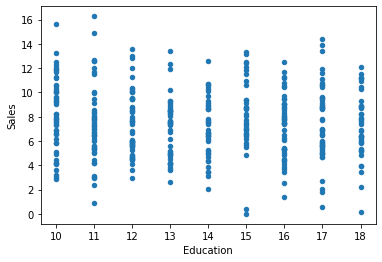

In [13]:
data.plot.scatter(x='Education', y='Sales')

<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

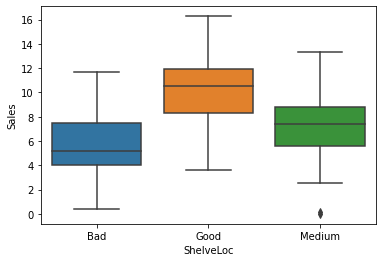

In [14]:
sns.boxplot(x='ShelveLoc', y='Sales',data=data)

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

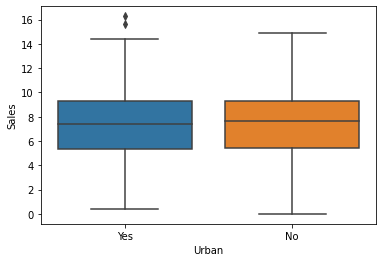

In [15]:
sns.boxplot(x='Urban', y='Sales',data=data)

<AxesSubplot:xlabel='US', ylabel='Sales'>

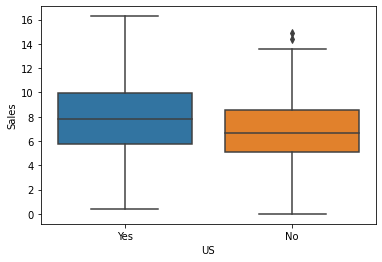

In [16]:
sns.boxplot(x='US', y='Sales',data=data)

In [17]:
corr = data.corr()
corr.sort_values(["Sales"], ascending = False, inplace = True)

print(corr.Sales)

Sales          1.000000
Advertising    0.269507
Income         0.151951
CompPrice      0.064079
Population     0.050471
Education     -0.051955
Age           -0.231815
Price         -0.444951
Name: Sales, dtype: float64


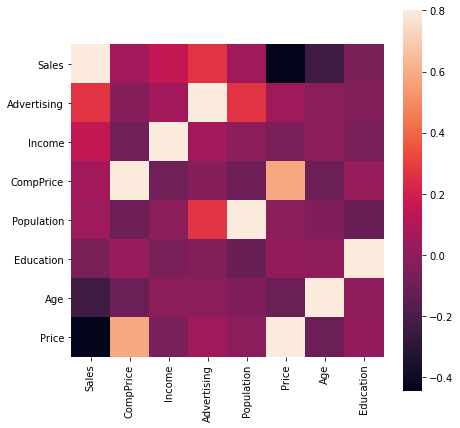

In [18]:
plt.subplots(figsize=(7, 7))
sns.heatmap(corr, vmax=.8, square=True);


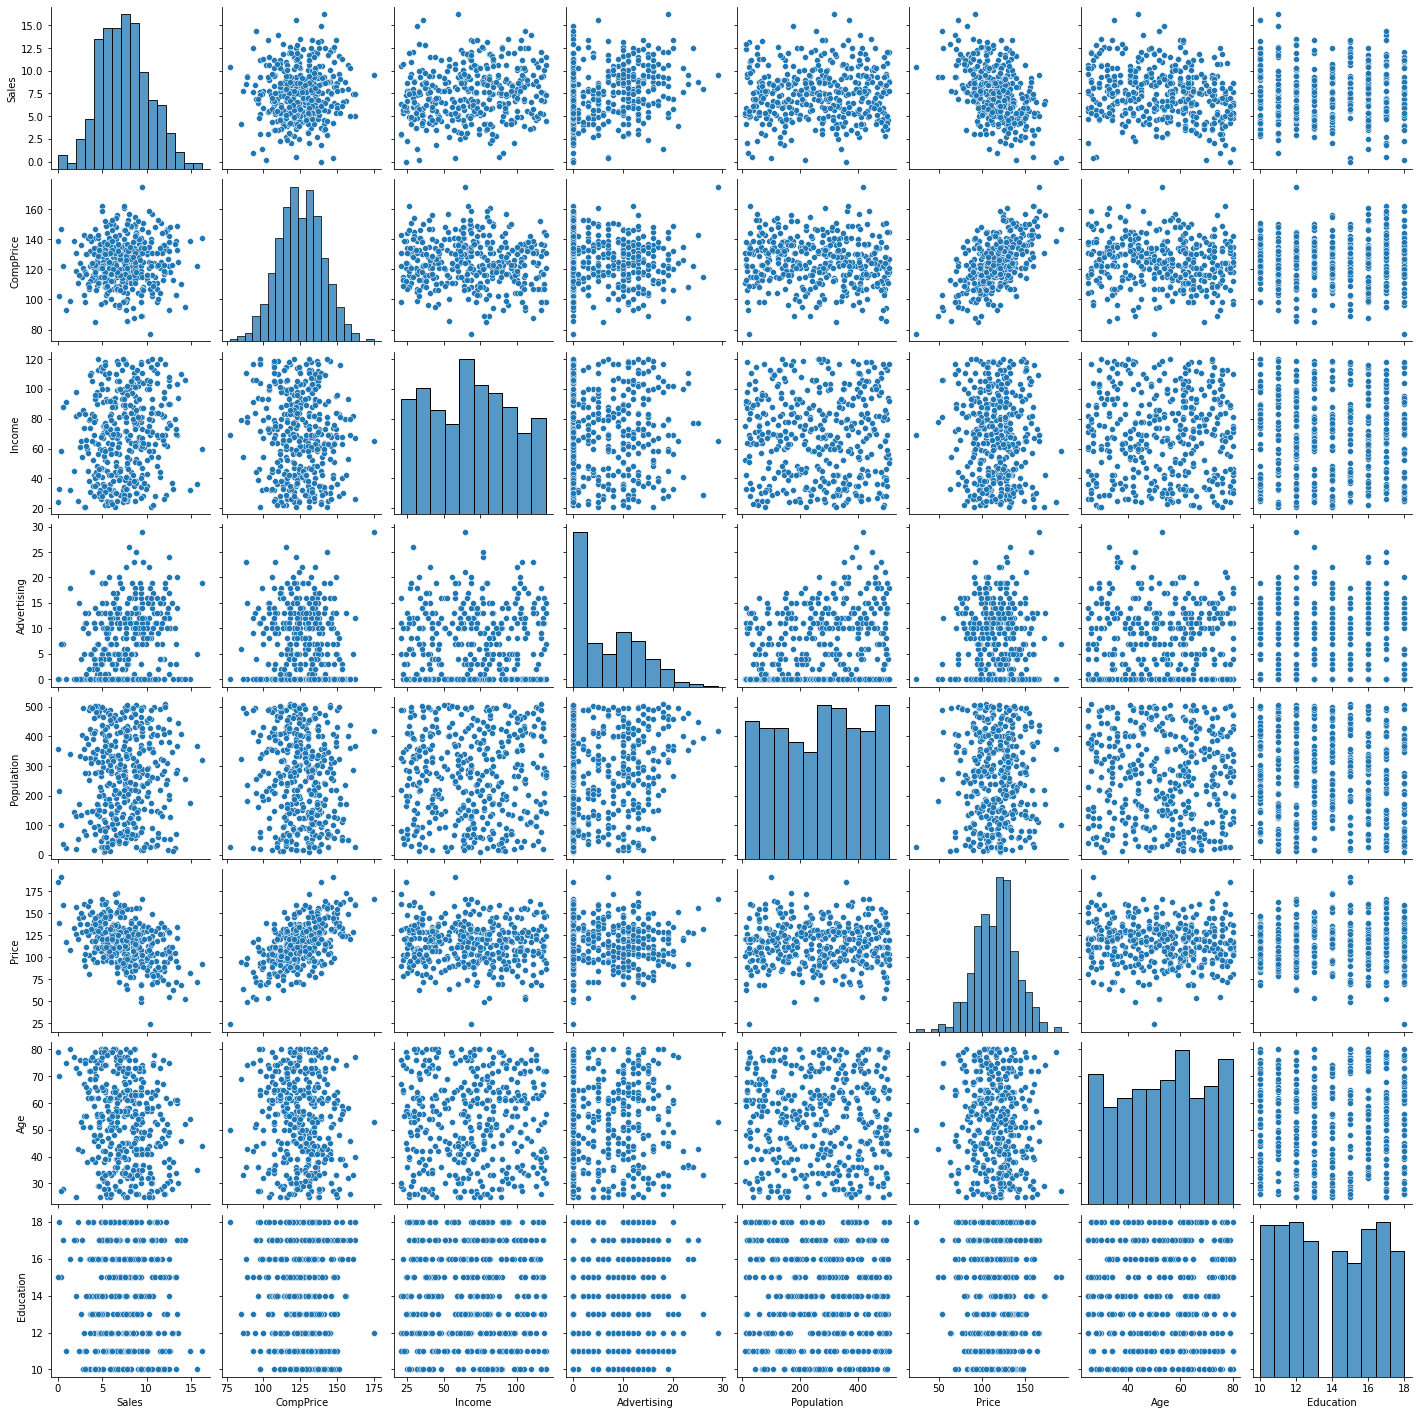

In [19]:
sns.pairplot(data, size = 2.5)
plt.show();

In [20]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

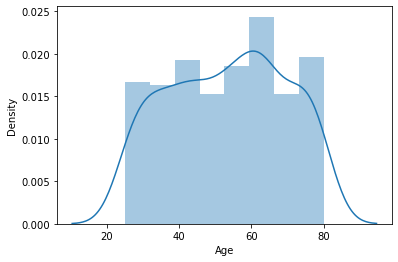

In [21]:
sns.distplot(data['Age'])

<AxesSubplot:>

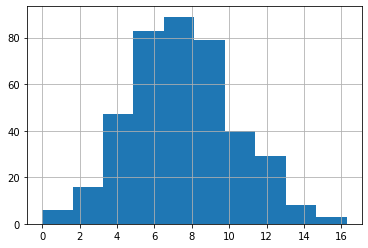

In [22]:
data['Sales'].hist()

In [23]:
data.loc[data['Sales'] <= 8, 'sales1'] = 'False' 
data.loc[data['Sales'] > 8, 'sales1'] = 'True' 


In [24]:
data=data.drop(['Sales'], axis=1)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales1
0,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,141,64,3,340,128,Bad,38,13,Yes,No,False
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,True
396,139,23,3,37,120,Medium,55,11,No,Yes,False
397,162,26,12,368,159,Medium,40,18,Yes,Yes,False
398,100,79,7,284,95,Bad,50,12,Yes,Yes,False


In [25]:
data.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales1         0
dtype: int64

<AxesSubplot:>

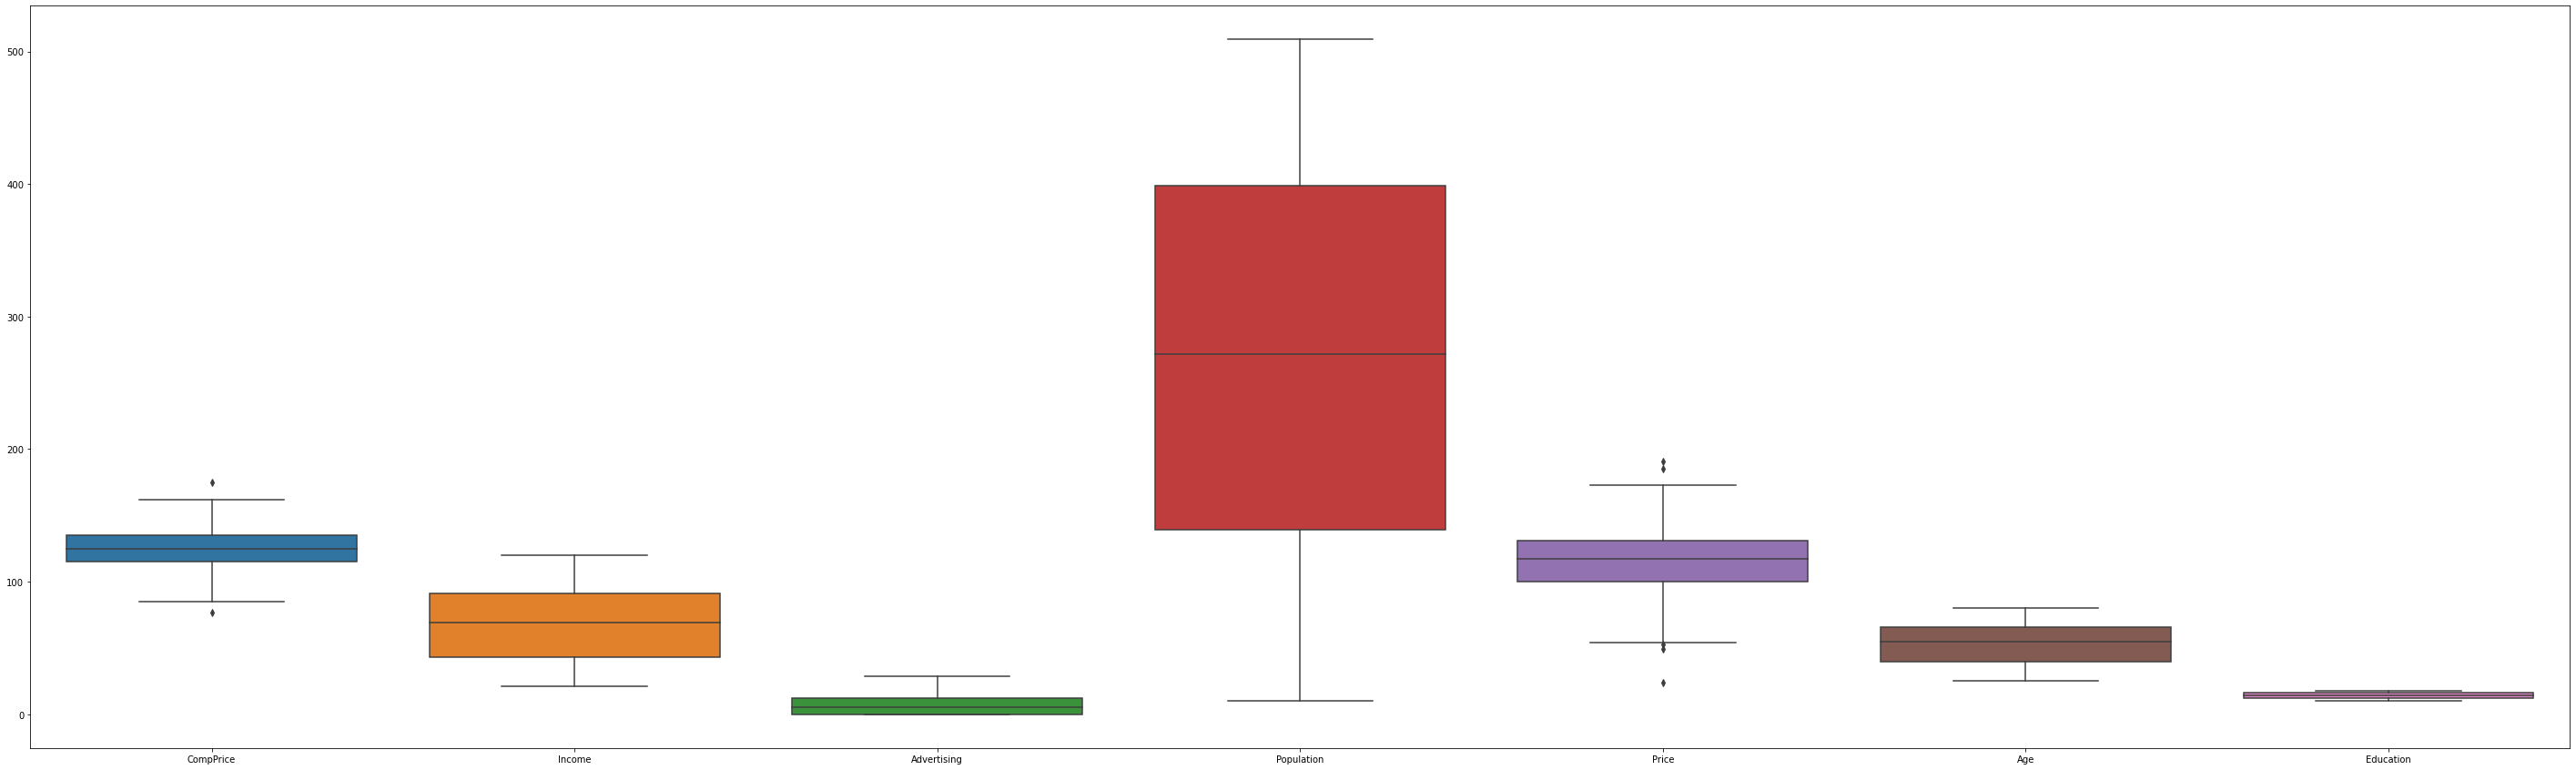

In [26]:
plt.figure(figsize=(50,15))
sns.boxplot(data=data)

In [27]:
data=data.apply(preprocessing.LabelEncoder().fit_transform)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales1
0,49,51,11,141,54,0,17,7,1,1,1
1,22,27,16,129,18,1,40,0,1,1,1
2,24,14,10,138,15,2,34,2,1,1,1
3,28,77,4,249,31,2,30,4,1,1,0
4,52,42,3,178,62,0,13,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,49,85,17,104,62,1,8,4,1,1,1
396,50,2,3,17,54,2,30,1,0,1,0
397,71,5,12,195,91,2,15,8,1,1,0
398,12,57,7,145,29,0,25,2,1,1,0


In [28]:
x=data.iloc[:,:10]
y=data['sales1']

In [29]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49,51,11,141,54,0,17,7,1,1
1,22,27,16,129,18,1,40,0,1,1
2,24,14,10,138,15,2,34,2,1,1
3,28,77,4,249,31,2,30,4,1,1
4,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...
395,49,85,17,104,62,1,8,4,1,1
396,50,2,3,17,54,2,30,1,0,1
397,71,5,12,195,91,2,15,8,1,1
398,12,57,7,145,29,0,25,2,1,1


In [30]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales1, Length: 400, dtype: int32

In [31]:
data['sales1'].unique()

array([1, 0])

In [32]:
data.sales1.value_counts()

0    236
1    164
Name: sales1, dtype: int64

In [33]:
colnames = list(data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales1']

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features='auto')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8150000000000001


In [35]:
seed = 7
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8125


In [36]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())


0.8775000000000001


# 2
# Use Random Forest to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [37]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [42]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


Skewness: 0.030015
Kurtosis: -1.199782


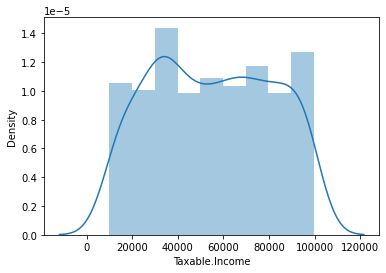

In [43]:
sns.distplot(data['Taxable.Income'])
#skewness and kurtosis
print("Skewness: %f" % data['Taxable.Income'].skew())
print("Kurtosis: %f" % data['Taxable.Income'].kurt())

<AxesSubplot:xlabel='Marital.Status', ylabel='Taxable.Income'>

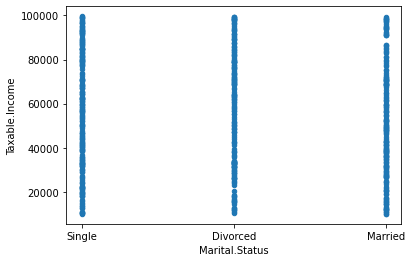

In [44]:
data.plot.scatter(x='Marital.Status', y='Taxable.Income')

<AxesSubplot:xlabel='City.Population', ylabel='Taxable.Income'>

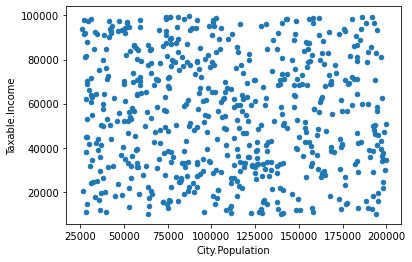

In [45]:
data.plot.scatter(x='City.Population', y='Taxable.Income')

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

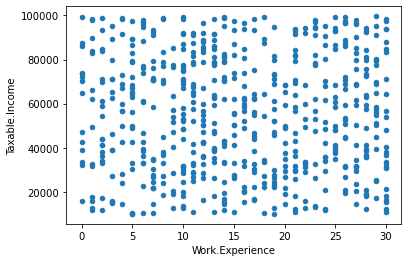

In [46]:
data.plot.scatter(x='Work.Experience', y='Taxable.Income')

<AxesSubplot:xlabel='Urban', ylabel='Taxable.Income'>

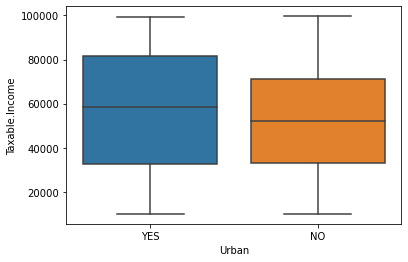

In [47]:
sns.boxplot(x='Urban', y='Taxable.Income',data=data)

<AxesSubplot:xlabel='Undergrad', ylabel='Taxable.Income'>

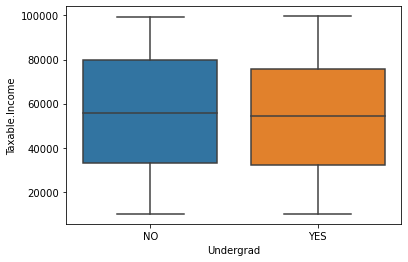

In [48]:
sns.boxplot(x='Undergrad', y='Taxable.Income',data=data)

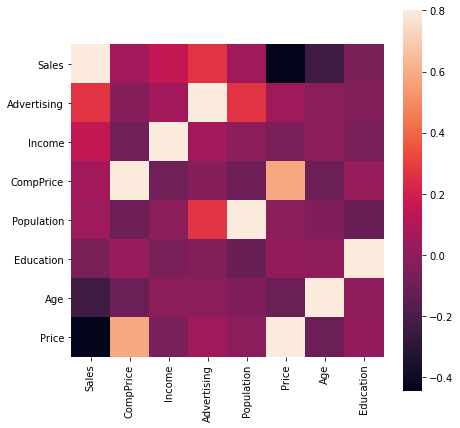

In [49]:
plt.subplots(figsize=(7, 7))
sns.heatmap(corr, vmax=.8, square=True);


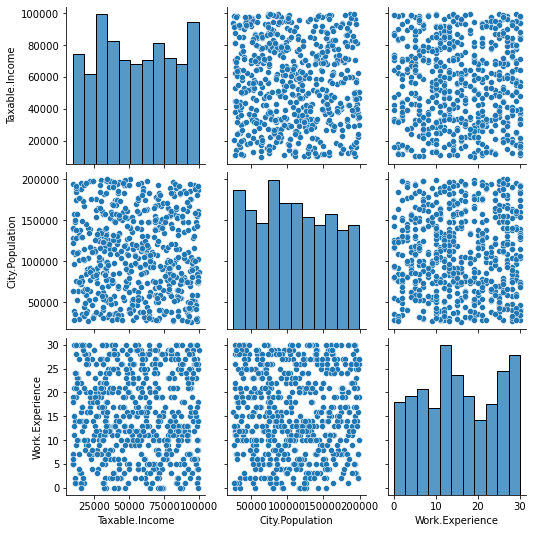

In [50]:
sns.pairplot(data, size = 2.5)
plt.show();

In [51]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

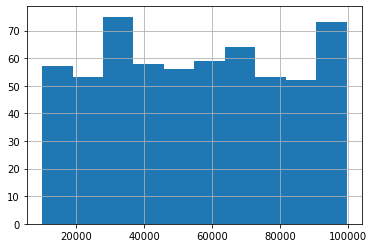

In [52]:
data['Taxable.Income'].hist()

In [53]:
data.loc[data['Taxable.Income'] <= 30000, 'Taxable.Income1'] = 'Risky' 
data.loc[data['Taxable.Income'] > 30000, 'Taxable.Income1'] = 'Good' 
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [54]:
data=data.drop(['Taxable.Income'], axis=1)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


<AxesSubplot:>

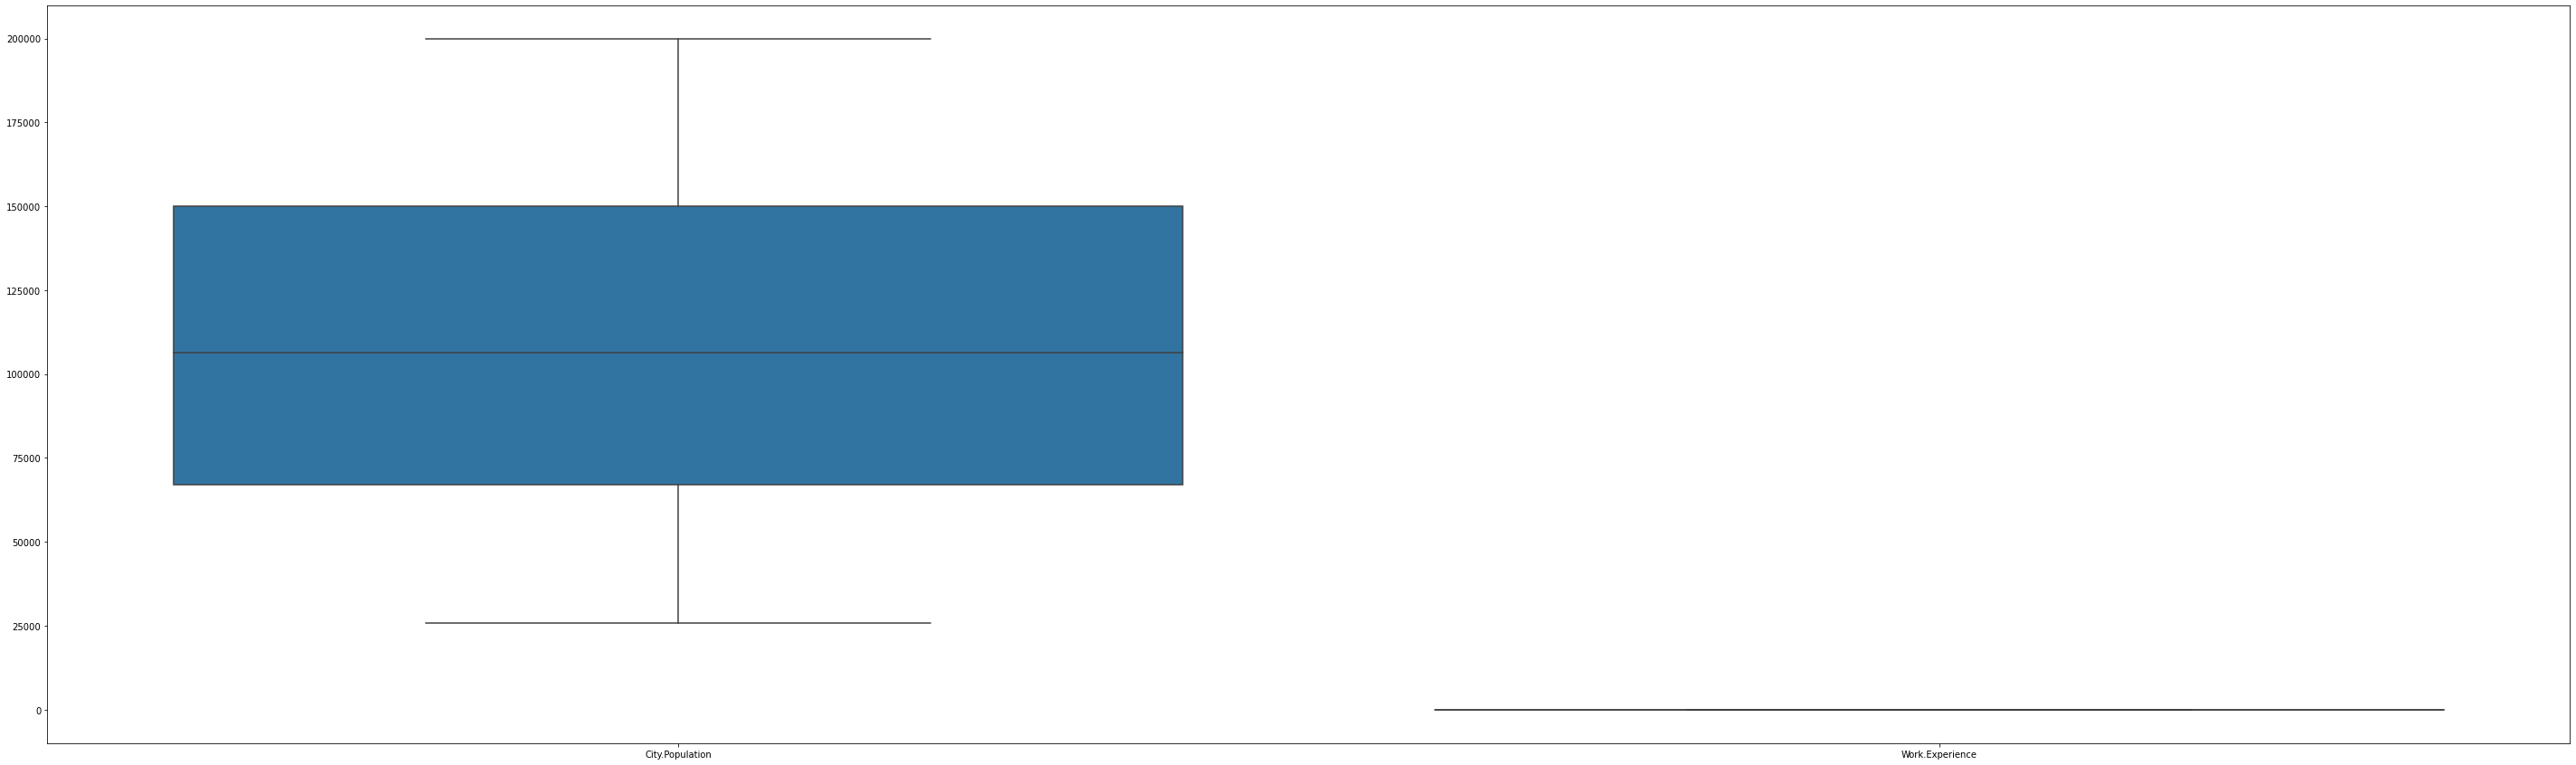

In [55]:
plt.figure(figsize=(50,15))
sns.boxplot(data=data)

In [56]:
data=data.apply(preprocessing.LabelEncoder().fit_transform)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,84,10,1,0
1,1,0,398,18,1,0
2,0,1,481,30,1,0
3,1,2,574,15,1,0
4,0,1,4,28,0,0
...,...,...,...,...,...,...
595,1,0,55,7,1,0
596,1,0,107,2,1,0
597,0,0,459,0,1,0
598,1,1,533,17,0,0


In [57]:
x=data.iloc[:,:5]
y=data['Taxable.Income1']

In [58]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,84,10,1
1,1,0,398,18,1
2,0,1,481,30,1
3,1,2,574,15,1
4,0,1,4,28,0
...,...,...,...,...,...
595,1,0,55,7,1
596,1,0,107,2,1
597,0,0,459,0,1
598,1,1,533,17,0


In [59]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income1, Length: 600, dtype: int32

In [60]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable.Income1']

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features='auto')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.75


In [62]:
seed = 7
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.74


In [63]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7716666666666667
